In [1]:
import yfinance as yf

from datetime import date, timedelta
today = date.today()
today
end_date = today.strftime("2023-01-01")
end_date
d1 = date.today() - timedelta(days=360*5) #for last 5 years
d1
start_date = d1.strftime("2015-01-01")
start_date
df = yf.download(tickers = "GOOGL",
                  start = start_date,
                  end = end_date)




[*********************100%***********************]  1 of 1 completed


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import streamlit as st


In [3]:
df.head()





,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,26.629999,26.790001,26.393999,26.477501,26.477501,26480000
2015-01-05,26.357500,26.399500,25.887501,25.973000,25.973000,41182000
2015-01-06,26.025000,26.060499,25.277500,25.332001,25.332001,54456000
2015-01-07,25.547501,25.574499,25.182501,25.257500,25.257500,46918000
2015-01-08,25.075500,25.375000,24.750999,25.345501,25.345501,73054000


In [4]:
df = df.reset_index()

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,26.629999,26.790001,26.393999,26.477501,26.477501,26480000
1,2015-01-05,26.357500,26.399500,25.887501,25.973000,25.973000,41182000
2,2015-01-06,26.025000,26.060499,25.277500,25.332001,25.332001,54456000
3,2015-01-07,25.547501,25.574499,25.182501,25.257500,25.257500,46918000
4,2015-01-08,25.075500,25.375000,24.750999,25.345501,25.345501,73054000


In [6]:
df=df.drop(['Date','Adj Close'],axis =1)
df.head()

,Open,High,Low,Close,Volume
0,26.629999,26.790001,26.393999,26.477501,26480000
1,26.357500,26.399500,25.887501,25.973000,41182000
2,26.025000,26.060499,25.277500,25.332001,54456000
3,25.547501,25.574499,25.182501,25.257500,46918000
4,25.075500,25.375000,24.750999,25.345501,73054000


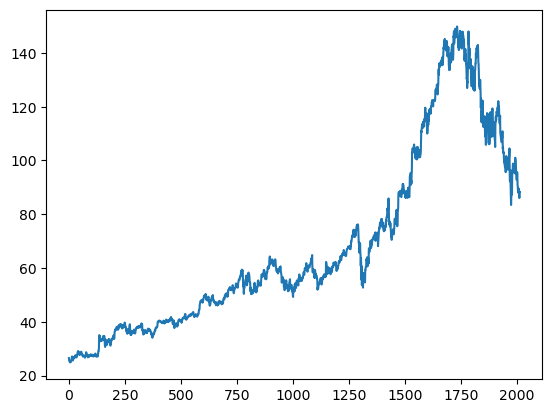

In [7]:
plt.plot(df.Close)

In [8]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2009    101.3288
2010    101.0208
2011    100.7063
2012    100.4178
2013    100.1338
Name: Close, Length: 2014, dtype: float64

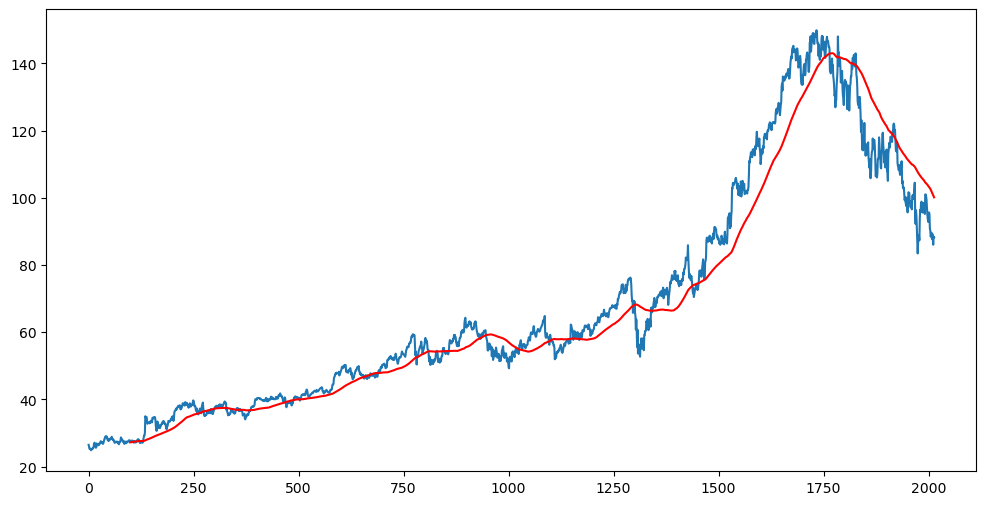

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

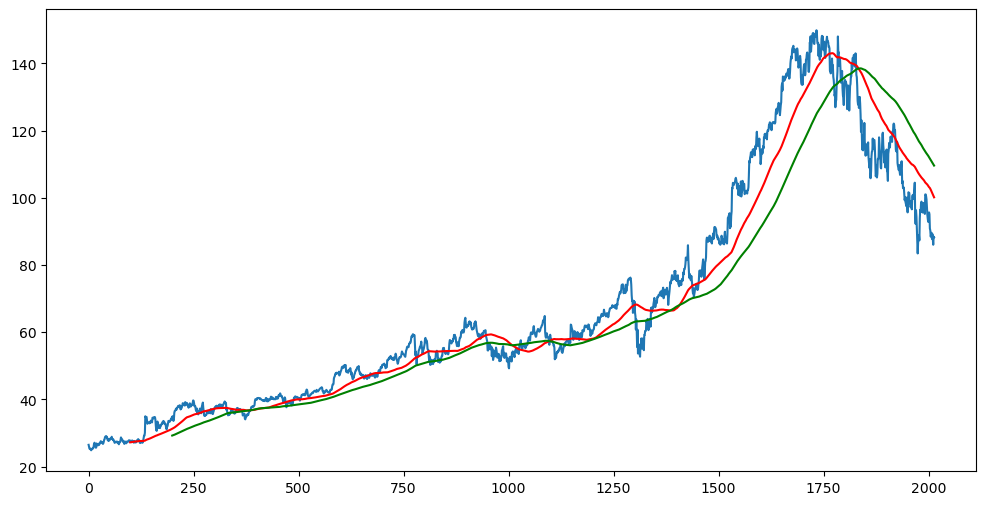

In [10]:
ma200=df.Close.rolling(200).mean()
ma200
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [11]:
df.shape

(2014, 5)

In [12]:
#Splitting our data into testing and training 
data_training =pd.DataFrame(df['Close'][0:int (len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int (len(df)*0.70):int (len(df))])
print(data_training.shape)
print(data_testing.shape)

(1409, 1)
(605, 1)


In [13]:
data_training.head()

,Close
0,26.477501
1,25.973000
2,25.332001
3,25.257500
4,25.345501


In [14]:
data_testing.head()

,Close
1409,74.918503
1410,74.841003
1411,74.027000
1412,75.362000
1413,75.832497


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler (feature_range=(0,1))

In [16]:
data_training_array=scaler.fit_transform(data_training)
data_training_array



array([[0.03042734],
       [0.02097789],
       [0.0089718 ],
       ...,
       [0.91426218],
       [0.91968454],
       [0.94390278]])

In [17]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

    


In [18]:
x_train,y_train= np.array(x_train),np.array(y_train)    

In [19]:
#ML model

In [20]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [21]:
model =Sequential()
model.add(LSTM(units = 50,activation = 'relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation = 'relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80,activation = 'relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))



In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
41/41 [==============================] - 11s 168ms/step - loss: 0.0558
Epoch 2/50
41/41 [==============================] - 7s 169ms/step - loss: 0.0125
Epoch 3/50
41/41 [==============================] - 7s 171ms/step - loss: 0.0106
Epoch 4/50
41/41 [==============================] - 7s 165ms/step - loss: 0.0099
Epoch 5/50
41/41 [==============================] - 7s 168ms/step - loss: 0.0079
Epoch 6/50
41/41 [==============================] - 7s 167ms/step - loss: 0.0081
Epoch 7/50
41/41 [==============================] - 7s 161ms/step - loss: 0.0074
Epoch 8/50
41/41 [==============================] - 7s 166ms/step - loss: 0.0081
Epoch 9/50
41/41 [==============================] - 7s 159ms/step - loss: 0.0073
Epoch 10/50
41/41 [==============================] - 7s 164ms/step - loss: 0.0073
Epoch 11/50
41/41 [==============================] - 7s 160ms/step - loss: 0.0068
Epoch 12/50
41/41 [==============================] - 7s 164ms/step - loss: 0.0068
Epoch 13/50
41/41 [=====

In [24]:
model.save("keras_model.h5")

C:\Users\ankus\anaconda3\Anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
data_testing.head()

,Close
1409,74.918503
1410,74.841003
1411,74.027000
1412,75.362000
1413,75.832497


In [26]:
data_training.tail(100)


,Close
1309,55.903000
1310,54.559502
1311,55.583500
1312,53.410500
1313,52.706501
...,...
1404,74.397499
1405,74.138000
1406,73.665001
1407,73.954498


In [27]:
past_100_days=data_training.tail(100)

In [38]:
final_df=past_100_days.append(data_testing,ignore_index=True)


C:\Users\ankus\AppData\Local\Temp\ipykernel_33928\2155672971.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [39]:
final_df.head()

,Close
0,55.903000
1,54.559502
2,55.583500
3,53.410500
4,52.706501


In [40]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.03290881],
       [0.01907714],
       [0.02961948],
       [0.00724785],
       [0.        ],
       [0.03906023],
       [0.02444612],
       [0.0560011 ],
       [0.02889367],
       [0.04745086],
       [0.05550178],
       [0.02469319],
       [0.03237862],
       [0.0198544 ],
       [0.06643536],
       [0.06611104],
       [0.07869186],
       [0.07847051],
       [0.08044722],
       [0.10866656],
       [0.10458449],
       [0.10465137],
       [0.11575485],
       [0.1065663 ],
       [0.08134807],
       [0.10515588],
       [0.11172422],
       [0.11451943],
       [0.11156466],
       [0.09186468],
       [0.1482776 ],
       [0.15060431],
       [0.13548055],
       [0.13835292],
       [0.15179854],
       [0.14995057],
       [0.16222765],
       [0.16998005],
       [0.17988918],
       [0.16526481],
       [0.15144335],
       [0.15583434],
       [0.16417348],
       [0.17041245],
       [0.16486328],
       [0.18275645],
       [0.18151588],
       [0.184

In [41]:
input_data.shape

(705, 1)

In [42]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [43]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(605, 100, 1)
(605,)


In [44]:
#Making Prediction
y_predicted =model.predict(x_test)


19/19 [==============================] - 1s 44ms/step


In [45]:
y_predicted.shape

(605, 1)

In [46]:
y_test

array([0.22867852, 0.22788064, 0.21950026, 0.23324444, 0.23808833,
       0.23190089, 0.23787727, 0.25823107, 0.25248114, 0.26876826,
       0.26841826, 0.27334966, 0.2840053 , 0.30371038, 0.29567497,
       0.30129098, 0.29619487, 0.30934704, 0.34142196, 0.29618458,
       0.2713215 , 0.24166597, 0.25382987, 0.24292712, 0.23763025,
       0.23406289, 0.24759601, 0.23574104, 0.22284619, 0.20434044,
       0.19355622, 0.20883433, 0.18287482, 0.18980868, 0.1981479 ,
       0.20823722, 0.21202592, 0.21180968, 0.22328888, 0.20666205,
       0.22067909, 0.20430447, 0.20848433, 0.22098794, 0.23489682,
       0.26276612, 0.26404274, 0.26217411, 0.25807146, 0.26436706,
       0.24493469, 0.25581168, 0.27378205, 0.28442222, 0.29797081,
       0.27290697, 0.28041736, 0.23507701, 0.25879731, 0.28928669,
       0.29351298, 0.30449796, 0.35607217, 0.36464295, 0.36321709,
       0.364087  , 0.35188713, 0.35678255, 0.35451239, 0.36966703,
       0.37057817, 0.36421055, 0.3533902 , 0.3626199 , 0.35119

In [47]:
y_predicted


array([[0.2315191 ],
       [0.23118329],
       [0.2308361 ],
       [0.2304897 ],
       [0.2301658 ],
       [0.22988826],
       [0.22966789],
       [0.22951356],
       [0.22945555],
       [0.22950615],
       [0.2296915 ],
       [0.23003432],
       [0.23053516],
       [0.2311816 ],
       [0.23206514],
       [0.23323283],
       [0.23471133],
       [0.23652253],
       [0.23870157],
       [0.2415255 ],
       [0.24484321],
       [0.24831055],
       [0.25142586],
       [0.25374815],
       [0.25497845],
       [0.25505024],
       [0.25405225],
       [0.25225973],
       [0.2500036 ],
       [0.24749047],
       [0.24488184],
       [0.24233727],
       [0.23993397],
       [0.23767541],
       [0.23561026],
       [0.23373757],
       [0.23206097],
       [0.23059368],
       [0.2293435 ],
       [0.22832218],
       [0.22751234],
       [0.22689815],
       [0.22644226],
       [0.22610979],
       [0.22588424],
       [0.22576953],
       [0.22580163],
       [0.226

In [48]:
scaler.scale_


array([0.01029527])

In [49]:
scale_factor = 1/0.01029527
y_predicted = y_predicted*scale_factor
y_test=y_test*scale_factor

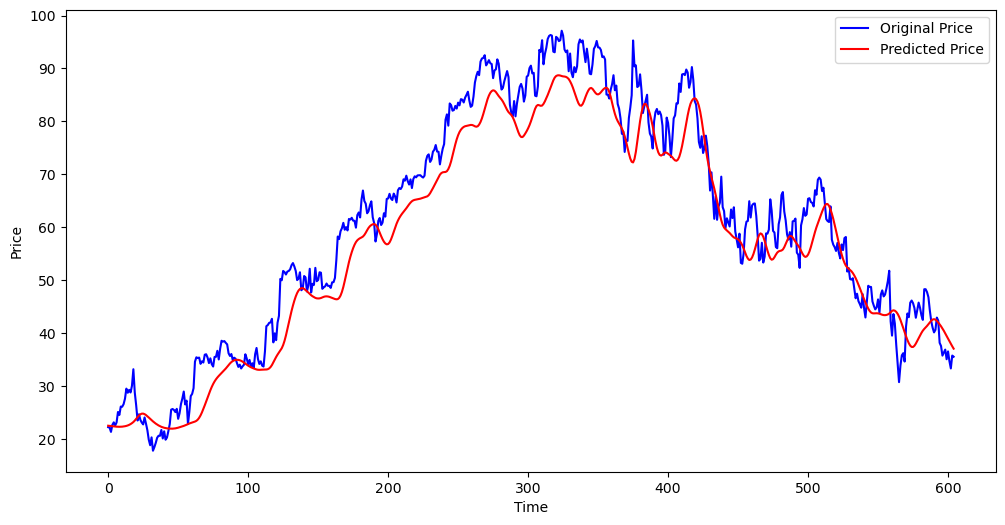

In [50]:
plt.figure(figsize=(12,6))

plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()